*Title*: Using 6 variables to produce a model to predict the diagnosis of heart disease using classification (closer to 0 or 1)

*Background Information:* 
Heart disease is a generalization of multiple separate conditions that include blood vessel diseases, arrhythmias, congenital heart defects, heart valve disease, heart infection, and problems with the heart muscle. Often caused by buildup of plaques in the arteries that results in thinner blood vessels, due to poor decision of lifestyle, such as smoking, health conditions such as high blood pressure, high cholesterol and diabetes, a diet high in salt and saturated fats etc, all being contributing factors. In addition, heart disease can result in deadly complications such as heart failure, heart attacks, strokes, sudden cardiac arrest and more. (American Heart Association, 2017)

*Research question:*
Therefore, through this project, we aim to produce a model to predict the diagnosis of heart disease using several classification techniques and algorithms in machine learning and language R. 

*Dataset information:*
We will be using multivariate data sets from the Heart Disease Data Set published by the University of California Irvine’s Machine Learning Repository. Looking specifically at data from Cleveland, Hungary and Switzerland, using 6 attributes to generate a predictive model. (Chellammal & Sharmila, 2019)

| Attribute | Value | Description |
| --- | --- | --- |
| age | 25-75 | Individual's age in years |
| trestbps | 90-170mm/Hg | Individuals' resting blood pressure |
| chol | <250mg/dL | Cholesterol levels |
| thalach | 100-190bpm | Individual's maximum heart rate reached |
| oldpeak | 0-3 in decimals | ST depression induced by exercise relative to rest |
| ca | 0,1,2,3 vessels | Number of major vessels coloured by fluoroscopy |
| num | 0,1 | Diagnosis of heart disease (angiographic disease status) |

*Preliminary exploratory data analysis:*

In [2]:
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [3]:
cleveland_data<-read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",
         col_names=c("age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"))%>%
add_column(ID="cleveland")
hungarian_data<-read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data",
         col_names=c("age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"))%>%
add_column(ID="hungarian")#%>%
         #this part is not necessary but if want to look tidier this works too: 
#mutate(slope=as.double(slope))%>%
#mutate(trestbps=as.double(trestbps))%>%
#mutate(chol=as.double(chol))%>%
#mutate(fbs=as.double(fbs))%>%
#mutate(restecg=as.double(restecg))%>%
#mutate(thalach=as.double(thalach))%>%
#mutate(exang=as.double(exang))
switzerland_data<-read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data",
         col_names=c("age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"))%>%
add_column(ID="switzerland")

filtered_data_c<-select(cleveland_data,age,trestbps,chol,thalach,oldpeak,ca,num,ID)
filtered_data_c

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_character(),
  thal = col_character(),
  num = col_double()
)

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_character(),
  chol = col_character(),
  fbs = col_character(),
  restecg = col_character(),
  thalach = col_character(),
  exang = col_character(),
  oldpeak = col_double(),
  slope = col_character(),
  ca = col_character(),
  thal = col_character(),
  num = col_double()
)

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_character(),
  chol = col_double(),
  fbs = col_character(),
  restecg = col_character(),
  thalach = c

age,trestbps,chol,thalach,oldpeak,ca,num,ID
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
63,145,233,150,2.3,0.0,0,cleveland
67,160,286,108,1.5,3.0,2,cleveland
67,120,229,129,2.6,2.0,1,cleveland
37,130,250,187,3.5,0.0,0,cleveland
41,130,204,172,1.4,0.0,0,cleveland
56,120,236,178,0.8,0.0,0,cleveland
62,140,268,160,3.6,2.0,3,cleveland
57,120,354,163,0.6,0.0,0,cleveland
63,130,254,147,1.4,1.0,2,cleveland


In [4]:
total_data<-rbind(cleveland_data,hungarian_data,switzerland_data)

total_filtered_data<-total_data%>%
select(age,trestbps,chol,thalach,oldpeak,ca,num,ID)%>%#selectedonly6categories
filter(num==0|num==1) %>% #dunnowhat3and2meansofilteredthemout
mutate(ca = as.numeric(ca)) %>%
mutate(num = as.factor(num))

total_filtered_data

Warning message:
“Problem with `mutate()` input `ca`.
ℹ NAs introduced by coercion
ℹ Input `ca` is `as.numeric(ca)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”


age,trestbps,chol,thalach,oldpeak,ca,num,ID
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<fct>,<chr>
63,145,233,150,2.3,0,0,cleveland
67,120,229,129,2.6,2,1,cleveland
37,130,250,187,3.5,0,0,cleveland
41,130,204,172,1.4,0,0,cleveland
56,120,236,178,0.8,0,0,cleveland
57,120,354,163,0.6,0,0,cleveland
53,140,203,155,3.1,0,1,cleveland
57,140,192,148,0.4,0,0,cleveland
56,140,294,153,1.3,0,0,cleveland


In [5]:
set.seed(1234)

heart_disease_split<-initial_split(total_filtered_data,prop=0.75,strata=num)
heart_disease_training<-training(heart_disease_split)
heart_disease_testing<-testing(heart_disease_split)

In [6]:
heart_disease_training_wdisesase <- heart_disease_training %>%
                                    filter(num==1)

heart_disease_training_nodisesase <- heart_disease_training %>%
                                    filter(num==0)

heart_disease_training_combined <- rbind(heart_disease_training_wdisesase, heart_disease_training_nodisesase)
heart_disease_training_age <- heart_disease_training %>%
                                group_by(age, num) %>%
                                summarize(n = n())

heart_disease_training_ca <- heart_disease_training %>%
                                    group_by(ca, num) %>%
                                    summarize(n = n())

heart_disease_training_ca

`summarise()` regrouping output by 'age' (override with `.groups` argument)

`summarise()` regrouping output by 'ca' (override with `.groups` argument)



ca,num,n
<dbl>,<fct>,<int>
0,0,96
0,1,22
1,0,15
1,1,15
2,0,6
2,1,6
3,0,2
3,1,2
NA,0,151


Warning message:
“Removed 2 rows containing missing values (position_stack).”
Warning message:
“Removed 2 rows containing missing values (position_stack).”


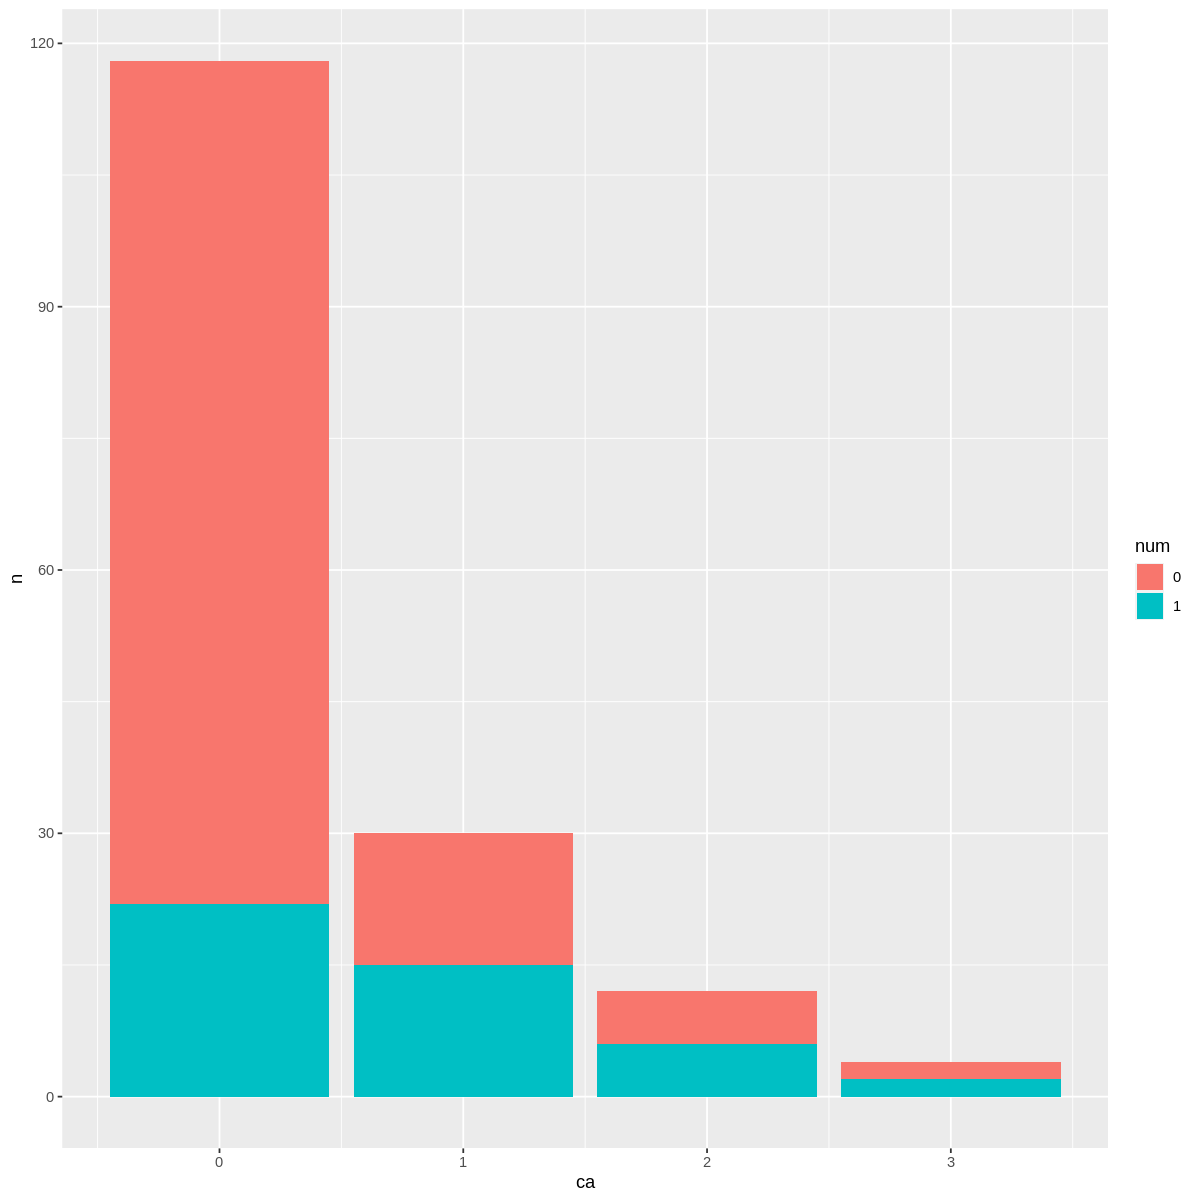

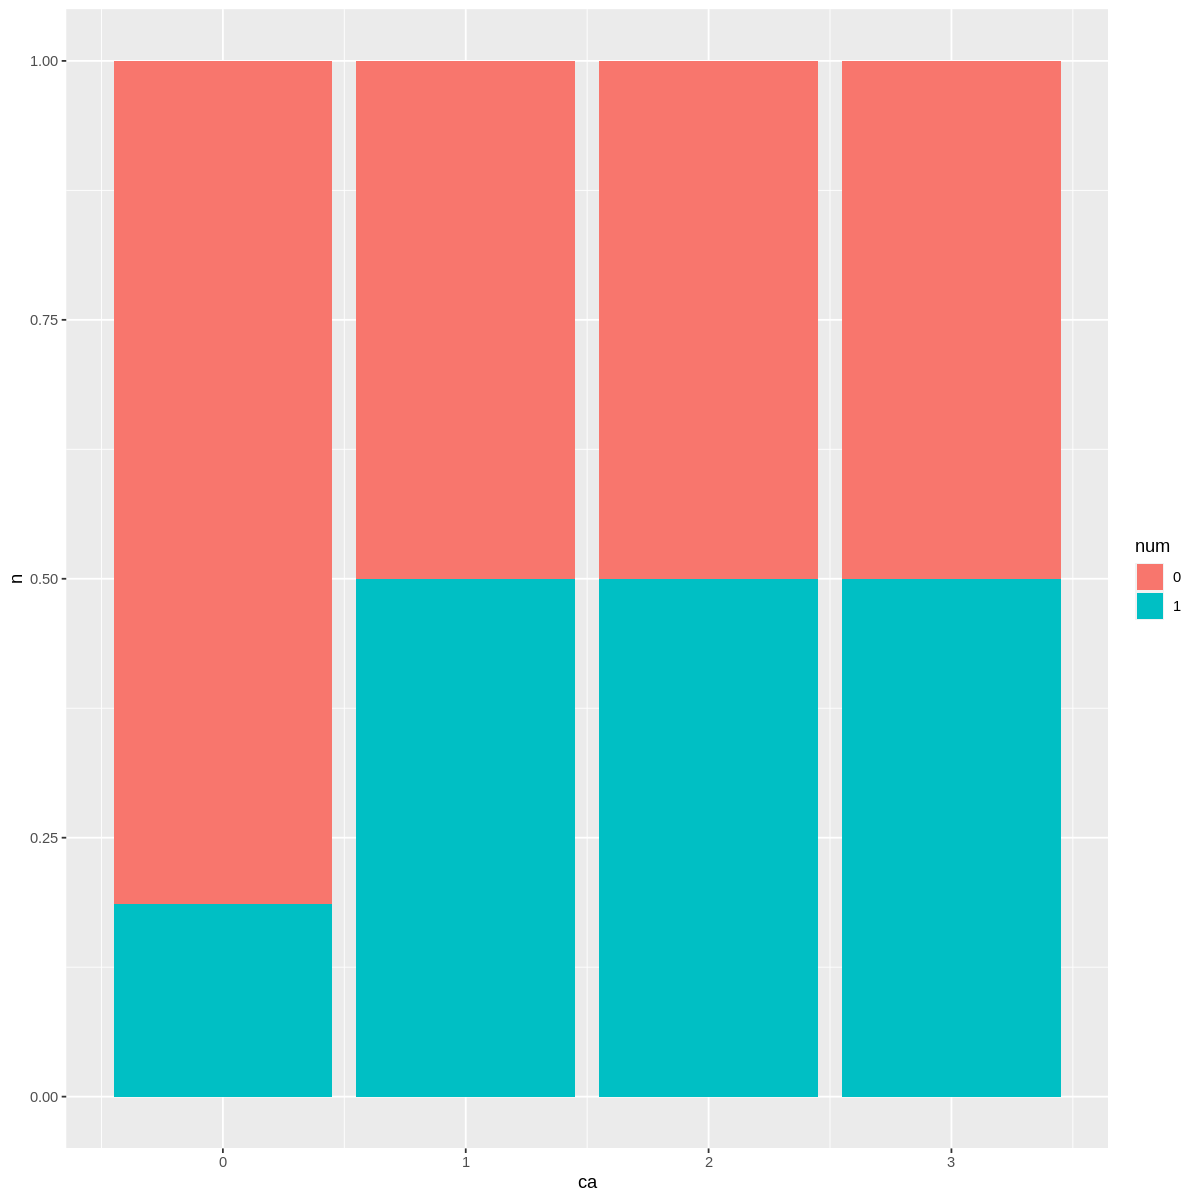

In [7]:
set.seed(1234)

options(repr.plot.width=10, repr.plot.height=10)
# heart_disease_graph <- ggplot(heart_disease_training_combined, aes(length, fill = num)) + 
#    geom_histogram(alpha = 0.5, aes(y = ..density..), position = 'identity')

heart_disease_graph_age <- ggplot(heart_disease_training_age, aes(x=age, y=n, fill=num)) +
                        geom_bar(position="stack", stat="identity") #add labels xddd

heart_disease_graph_ca1 <- ggplot(heart_disease_training_ca, aes(x=ca, y=n, fill=num)) +
                        geom_bar(position="stack", stat="identity") #add labels xddd

heart_disease_graph_ca2 <- ggplot(heart_disease_training_ca, aes(x=ca, y=n, fill=num)) +
                        geom_bar(position="fill", stat="identity") #add labels xddd

heart_disease_graph_ca1
heart_disease_graph_ca2

# age trestbps chol thalach oldpeak ca
# for chol, histogram not good graph
#things with a trend kinda: oldpeak: center more or less no heart disease, extremeties has heart disease; 
#                             thalach: line going down? but thalach in x axis and age in y axis ; 
#                             chol: line going up? chol in x axis and age in y axis;

*Methods:*

1) Consult TA on graphs 

2) Figure out what method to use based on the graphs





*Expected outcomes and significance:*

Expected findings: 
With the help of our model, we expect to be able to accurately predict whether an individual is more likely to have heart disease or not, if the resulting value is closer to 0 (does not have heart disease) or 1 (has heart disease) 

Impacts of findings: 
With deriving an accurate prediction model, it can aid the prediction of the presence or absence of heart disease, which is crucial to diagnose the disease at an early stage to prevent the development of severity that leads to life-threatening complications. Thus, providing medical professionals access to predicted knowledge which can highlight which patients are in dire need of medical attention versus those that are in need of less. 

Future questions:
An accurate prediction model is subjective as how accurate does the model have to be, in order to be determined as accurate. Hence, the future question of how many factored variables have to be taken into account for, in order to be considered the most accurate model?



*References:*

American Heart Association. (2017, May 31). What is cardiovascular disease? www.heart.org. Retrieved November 7, 2021, from https://www.heart.org/en/health-topics/consumer-healthcare/what-is-cardiovascular-disease. 

Chellammal, S., & Sharmila, R. (2019). Recommendation of attributes for heart disease prediction using Correlation Measure. International Journal of Recent Technology and Engineering, 8(2S3), 870–875. https://doi.org/10.35940/ijrte.b1163.0782s319 
